In [5]:
# !pip install prophet

08:04:24 - cmdstanpy - INFO - Chain [1] start processing
08:04:25 - cmdstanpy - INFO - Chain [1] done processing


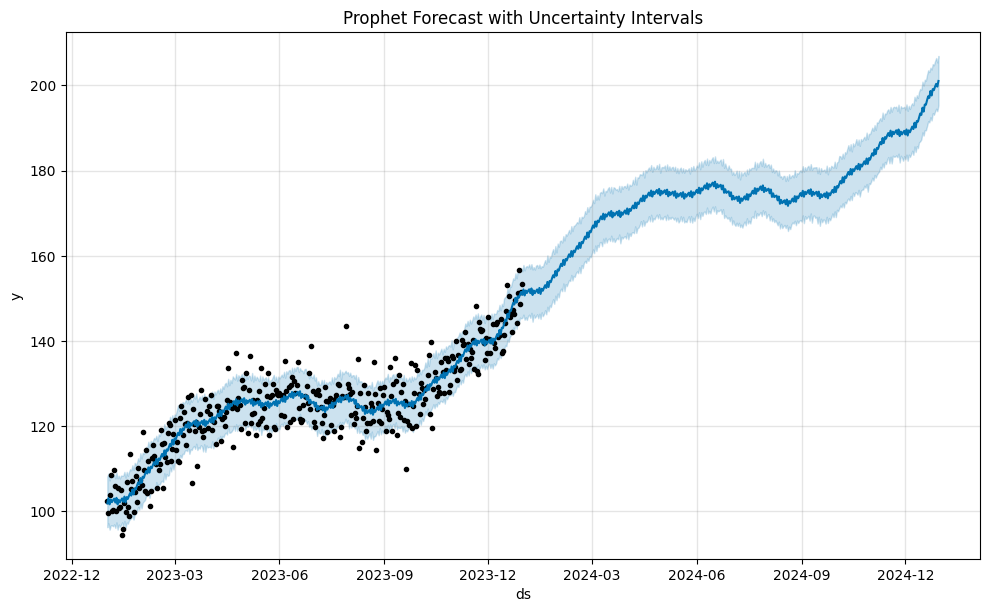

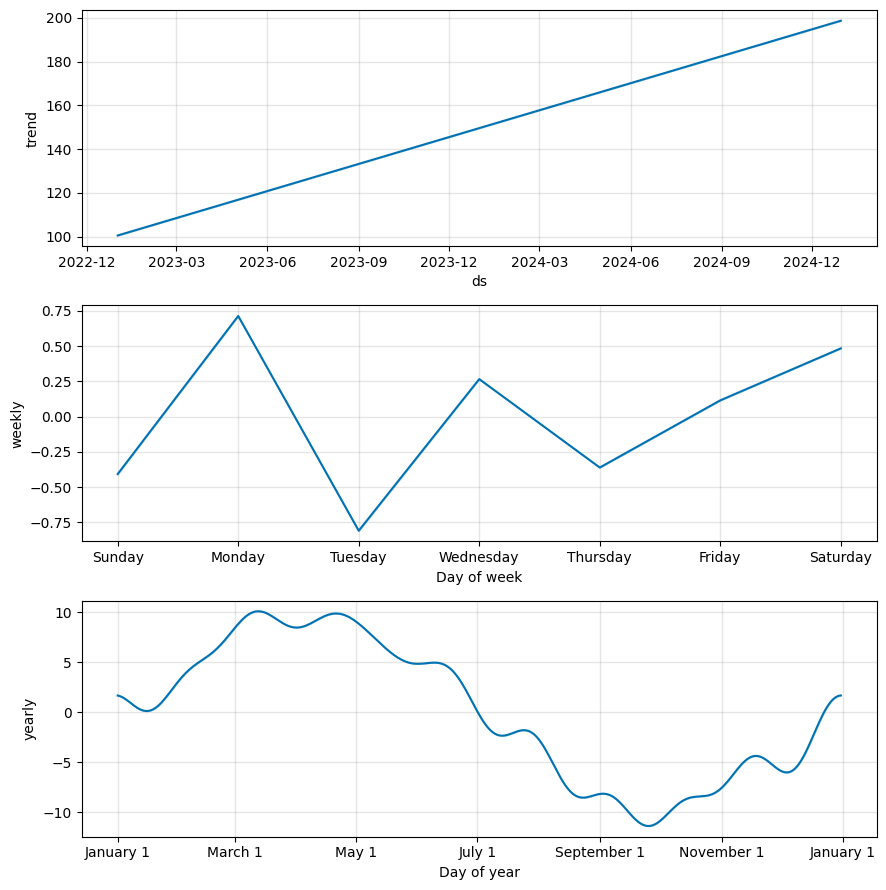

Seasonality has period of 365.25 days which is larger than initial window. Consider increasing initial.



Forecast Metrics:

Last 30 days of forecast:
            ds        yhat  yhat_lower  yhat_upper
700 2024-12-01  188.482777  182.634354  194.358135
701 2024-12-02  189.664565  183.745482  195.549413
702 2024-12-03  188.239241  182.297505  194.033875
703 2024-12-04  189.448784  183.749823  195.220994
704 2024-12-05  188.999605  183.195379  194.481230
705 2024-12-06  189.697599  183.848845  195.393671
706 2024-12-07  190.334131  184.660819  195.824539
707 2024-12-08  189.757882  183.701052  195.342871
708 2024-12-09  191.238415  185.670127  197.348931
709 2024-12-10  190.121181  184.356484  196.455010
710 2024-12-11  191.641255  185.746606  197.703825
711 2024-12-12  191.498017  185.270295  197.081201
712 2024-12-13  192.490387  186.656431  198.545608
713 2024-12-14  193.402980  186.867850  199.195528
714 2024-12-15  193.078125  187.331177  199.003823
715 2024-12-16  194.779589  188.985187  200.903644
716 2024-12-17  193.847731  188.222473  199.983492
717 2024-12-18  195.513360  189.5214

  0%|          | 0/2 [00:00<?, ?it/s]

08:04:26 - cmdstanpy - INFO - Chain [1] start processing
08:04:26 - cmdstanpy - INFO - Chain [1] done processing
08:04:26 - cmdstanpy - INFO - Chain [1] start processing
08:04:26 - cmdstanpy - INFO - Chain [1] done processing



Cross Validation Metrics:
   horizon      mape       rmse
77 86 days  0.068119  10.901287
78 87 days  0.070370  11.466989
79 88 days  0.068743  11.230336
80 89 days  0.071670  11.577995
81 90 days  0.080269  12.672096


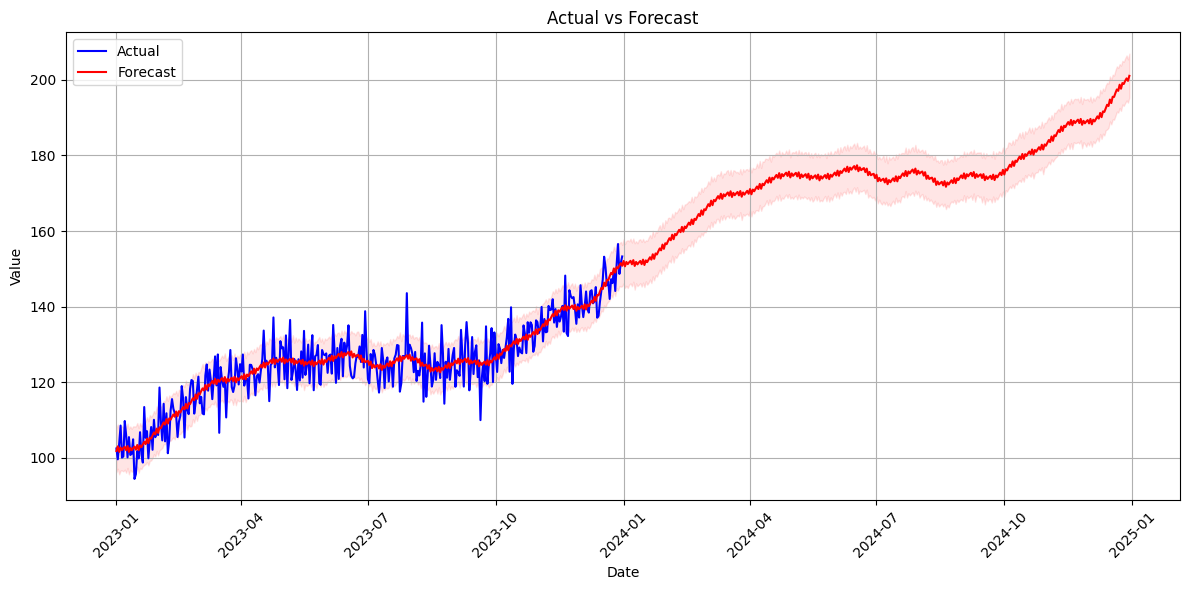

In [3]:
import pandas as pd
import numpy as np
from prophet import Prophet
import matplotlib.pyplot as plt
from datetime import datetime, timedelta

# Create sample data (replace this with your actual data)
np.random.seed(42)
dates = pd.date_range(start='2023-01-01', end='2023-12-31', freq='D')
base_value = 100
trend = np.linspace(0, 50, len(dates))  # Upward trend
seasonal = 10 * np.sin(2 * np.pi * np.arange(len(dates))/365)  # Yearly seasonality
noise = np.random.normal(0, 5, len(dates))
values = base_value + trend + seasonal + noise

# Create DataFrame in Prophet format
df = pd.DataFrame({
    'ds': dates,  # Prophet requires 'ds' for dates
    'y': values   # Prophet requires 'y' for values
})

# Initialize and fit Prophet model
model = Prophet(
    yearly_seasonality=True,
    weekly_seasonality=True,
    daily_seasonality=False,
    changepoint_prior_scale=0.05,  # Flexibility of trend changes
    seasonality_prior_scale=10,    # Flexibility of seasonality
    holidays_prior_scale=10        # Flexibility of holiday effects
)

model.fit(df)

# Create future dates for forecasting (365 days into future)
future_dates = model.make_future_dataframe(periods=365)

# Make predictions
forecast = model.predict(future_dates)

# Create visualization of the forecast
fig = model.plot(forecast)
plt.title('Prophet Forecast with Uncertainty Intervals')
plt.show()

# Plot the components (trend, yearly seasonality, weekly seasonality)
fig = model.plot_components(forecast)
plt.show()

# Print forecast metrics
print("\nForecast Metrics:")
print("\nLast 30 days of forecast:")
print(forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail(30))

# Calculate error metrics for the training period
actual_values = df['y']
predicted_values = forecast['yhat'][:len(df)]

mape = np.mean(np.abs((actual_values - predicted_values) / actual_values)) * 100
rmse = np.sqrt(np.mean((actual_values - predicted_values) ** 2))

print(f"\nModel Performance Metrics:")
print(f"MAPE: {mape:.2f}%")
print(f"RMSE: {rmse:.2f}")

# Optional: Cross validation
from prophet.diagnostics import cross_validation, performance_metrics

# Perform cross validation
df_cv = cross_validation(model, initial='240 days', 
                        period='30 days', 
                        horizon='90 days')

# Calculate performance metrics
df_metrics = performance_metrics(df_cv)
print("\nCross Validation Metrics:")
print(df_metrics[['horizon', 'mape', 'rmse']].tail())

# Optional: Plot the forecast with actual values
plt.figure(figsize=(12, 6))
plt.plot(df['ds'], df['y'], label='Actual', color='blue')
plt.plot(forecast['ds'], forecast['yhat'], label='Forecast', color='red')
plt.fill_between(forecast['ds'], 
                 forecast['yhat_lower'], 
                 forecast['yhat_upper'], 
                 color='red', 
                 alpha=0.1)
plt.title('Actual vs Forecast')
plt.xlabel('Date')
plt.ylabel('Value')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

I'll explain Facebook Prophet's concept and then provide a complete implementation example.

Prophet is a time series forecasting tool developed by Facebook that's particularly good at:
1. Handling missing data and outliers
2. Capturing seasonal patterns (daily, weekly, yearly)
3. Incorporating holiday effects
4. Detecting trend changes
5. Working with non-linear growth patterns

Key concepts of Prophet:
- It uses a decomposable time series model with three components:
  - Trend (g(t)): Models non-periodic changes
  - Seasonality (s(t)): Captures periodic changes (daily, weekly, yearly)
  - Holiday effects (h(t)): Accounts for holidays/special events
- The formula is: y(t) = g(t) + s(t) + h(t) + ε(t)
- It's designed to be robust to missing data and shifts in trend
- It automatically detects changes in trends by selecting changepoints

To use this code:

1. First install Prophet in Google Colab:
```python
!pip install prophet
```

2. The code provides:
   - Sample data generation (replace with your data)
   - Model fitting with customizable parameters
   - Forecasting future values
   - Multiple visualizations:
     - Standard Prophet forecast plot
     - Component plots showing trend and seasonality
     - Custom plot comparing actual vs. predicted values
   - Performance metrics including MAPE and RMSE
   - Cross-validation results

Key parameters you can adjust in the Prophet model:
- `changepoint_prior_scale`: Controls flexibility of trend (default=0.05)
- `seasonality_prior_scale`: Controls flexibility of seasonality (default=10)
- `holidays_prior_scale`: Controls holiday effects (default=10)
- `yearly_seasonality`: Set to True/False or number of Fourier terms
- `weekly_seasonality`: Same as yearly
- `daily_seasonality`: Same as yearly

To use with your own data, ensure it has:
1. A date column renamed to 'ds'
2. A value column renamed to 'y'